<a href="https://colab.research.google.com/github/indrabna/PRAKTIKUM_DATMIN/blob/main/084_Algoritma_Apriori_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritma Apriori

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df =pd.read_csv("DatasetBaru - Sheet1.csv")

In [3]:
df

,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
6,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN


In [4]:
# 1 Item set
df.sum()

Bread           3.0
Eggs            1.0
Yogurt          3.0
Milk            2.0
Corn            6.0
Ice Cream       5.0
Apple           5.0
Cheese          2.0
Nutmeg          4.0
Dill            3.0
Onion           3.0
Butter          4.0
Sugar           3.0
Kidney Beans    2.0
dtype: float64

In [5]:
# Itemnya ada apa aja si
df.columns

Index(['Bread', 'Eggs', 'Yogurt', 'Milk', 'Corn', 'Ice Cream', 'Apple',
       'Cheese', 'Nutmeg', 'Dill', 'Onion', 'Butter', 'Sugar', 'Kidney Beans'],
      dtype='object')

In [6]:
# 2 Item set
from itertools import permutations
# Mengekstrak item unik.
rules = list(permutations(df.columns, 2))
rules

[('Bread', 'Eggs'),
 ('Bread', 'Yogurt'),
 ('Bread', 'Milk'),
 ('Bread', 'Corn'),
 ('Bread', 'Ice Cream'),
 ('Bread', 'Apple'),
 ('Bread', 'Cheese'),
 ('Bread', 'Nutmeg'),
 ('Bread', 'Dill'),
 ('Bread', 'Onion'),
 ('Bread', 'Butter'),
 ('Bread', 'Sugar'),
 ('Bread', 'Kidney Beans'),
 ('Eggs', 'Bread'),
 ('Eggs', 'Yogurt'),
 ('Eggs', 'Milk'),
 ('Eggs', 'Corn'),
 ('Eggs', 'Ice Cream'),
 ('Eggs', 'Apple'),
 ('Eggs', 'Cheese'),
 ('Eggs', 'Nutmeg'),
 ('Eggs', 'Dill'),
 ('Eggs', 'Onion'),
 ('Eggs', 'Butter'),
 ('Eggs', 'Sugar'),
 ('Eggs', 'Kidney Beans'),
 ('Yogurt', 'Bread'),
 ('Yogurt', 'Eggs'),
 ('Yogurt', 'Milk'),
 ('Yogurt', 'Corn'),
 ('Yogurt', 'Ice Cream'),
 ('Yogurt', 'Apple'),
 ('Yogurt', 'Cheese'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Dill'),
 ('Yogurt', 'Onion'),
 ('Yogurt', 'Butter'),
 ('Yogurt', 'Sugar'),
 ('Yogurt', 'Kidney Beans'),
 ('Milk', 'Bread'),
 ('Milk', 'Eggs'),
 ('Milk', 'Yogurt'),
 ('Milk', 'Corn'),
 ('Milk', 'Ice Cream'),
 ('Milk', 'Apple'),
 ('Milk', 'Cheese'),
 ('M

In [7]:
# Filter yang ada isinya aja yang dihitung
rule_baru = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('Bread', 'Yogurt'),
 ('Bread', 'Corn'),
 ('Bread', 'Ice Cream'),
 ('Bread', 'Cheese'),
 ('Bread', 'Nutmeg'),
 ('Bread', 'Dill'),
 ('Bread', 'Onion'),
 ('Bread', 'Sugar'),
 ('Eggs', 'Corn'),
 ('Eggs', 'Apple'),
 ('Eggs', 'Nutmeg'),
 ('Eggs', 'Butter'),
 ('Eggs', 'Kidney Beans'),
 ('Yogurt', 'Bread'),
 ('Yogurt', 'Corn'),
 ('Yogurt', 'Ice Cream'),
 ('Yogurt', 'Cheese'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Dill'),
 ('Yogurt', 'Onion'),
 ('Yogurt', 'Sugar'),
 ('Milk', 'Ice Cream'),
 ('Milk', 'Apple'),
 ('Milk', 'Nutmeg'),
 ('Milk', 'Onion'),
 ('Corn', 'Bread'),
 ('Corn', 'Eggs'),
 ('Corn', 'Yogurt'),
 ('Corn', 'Ice Cream'),
 ('Corn', 'Apple'),
 ('Corn', 'Cheese'),
 ('Corn', 'Nutmeg'),
 ('Corn', 'Dill'),
 ('Corn', 'Onion'),
 ('Corn', 'Butter'),
 ('Corn', 'Sugar'),
 ('Corn', 'Kidney Beans'),
 ('Ice Cream', 'Bread'),
 ('Ice Cream', 'Yogurt'),
 ('Ice Cream', 'Milk'),
 ('Ice Cream', 'Corn'),
 ('Ice Cream', 'Apple'),
 ('Ice Cream', 'Cheese'),
 ('Ice Cream', 'Nutmeg'),
 ('Ice Cream', 'Dill'),
 

In [9]:
hitung = {}
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)]= banyak_data

hitung

{"('Bread', 'Yogurt')": 3,
 "('Bread', 'Corn')": 2,
 "('Bread', 'Ice Cream')": 3,
 "('Bread', 'Cheese')": 1,
 "('Bread', 'Nutmeg')": 1,
 "('Bread', 'Dill')": 1,
 "('Bread', 'Onion')": 1,
 "('Bread', 'Sugar')": 3,
 "('Eggs', 'Corn')": 1,
 "('Eggs', 'Apple')": 1,
 "('Eggs', 'Nutmeg')": 1,
 "('Eggs', 'Butter')": 1,
 "('Eggs', 'Kidney Beans')": 1,
 "('Yogurt', 'Bread')": 3,
 "('Yogurt', 'Corn')": 2,
 "('Yogurt', 'Ice Cream')": 3,
 "('Yogurt', 'Cheese')": 1,
 "('Yogurt', 'Nutmeg')": 1,
 "('Yogurt', 'Dill')": 1,
 "('Yogurt', 'Onion')": 1,
 "('Yogurt', 'Sugar')": 3,
 "('Milk', 'Ice Cream')": 1,
 "('Milk', 'Apple')": 1,
 "('Milk', 'Nutmeg')": 1,
 "('Milk', 'Onion')": 1,
 "('Corn', 'Bread')": 2,
 "('Corn', 'Eggs')": 1,
 "('Corn', 'Yogurt')": 2,
 "('Corn', 'Ice Cream')": 2,
 "('Corn', 'Apple')": 4,
 "('Corn', 'Cheese')": 2,
 "('Corn', 'Nutmeg')": 2,
 "('Corn', 'Dill')": 3,
 "('Corn', 'Onion')": 2,
 "('Corn', 'Butter')": 4,
 "('Corn', 'Sugar')": 2,
 "('Corn', 'Kidney Beans')": 2,
 "('Ice Cream', 

In [10]:
# List support
supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,support in hitung.items():
  print(f"{item} support = {support/len(df)*100}%")

---
('Bread', 'Yogurt') support = 30.0%
('Bread', 'Corn') support = 20.0%
('Bread', 'Ice Cream') support = 30.0%
('Bread', 'Cheese') support = 10.0%
('Bread', 'Nutmeg') support = 10.0%
('Bread', 'Dill') support = 10.0%
('Bread', 'Onion') support = 10.0%
('Bread', 'Sugar') support = 30.0%
('Eggs', 'Corn') support = 10.0%
('Eggs', 'Apple') support = 10.0%
('Eggs', 'Nutmeg') support = 10.0%
('Eggs', 'Butter') support = 10.0%
('Eggs', 'Kidney Beans') support = 10.0%
('Yogurt', 'Bread') support = 30.0%
('Yogurt', 'Corn') support = 20.0%
('Yogurt', 'Ice Cream') support = 30.0%
('Yogurt', 'Cheese') support = 10.0%
('Yogurt', 'Nutmeg') support = 10.0%
('Yogurt', 'Dill') support = 10.0%
('Yogurt', 'Onion') support = 10.0%
('Yogurt', 'Sugar') support = 30.0%
('Milk', 'Ice Cream') support = 10.0%
('Milk', 'Apple') support = 10.0%
('Milk', 'Nutmeg') support = 10.0%
('Milk', 'Onion') support = 10.0%
('Corn', 'Bread') support = 20.0%
('Corn', 'Eggs') support = 10.0%
('Corn', 'Yogurt') support = 20.0

In [14]:
a=("indra,ibe")
a.split(",")

['indra', 'ibe']

In [16]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  #memisahkan menjadi dictionary
  i = item.strip().split(",")
  i = eval(item)
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
Bread->Yogurt  Confidence = 100.0%
Bread->Corn  Confidence = 66.66666666666666%
Bread->Ice Cream  Confidence = 100.0%
Bread->Cheese  Confidence = 33.33333333333333%
Bread->Nutmeg  Confidence = 33.33333333333333%
Bread->Dill  Confidence = 33.33333333333333%
Bread->Onion  Confidence = 33.33333333333333%
Bread->Sugar  Confidence = 100.0%
Eggs->Corn  Confidence = 100.0%
Eggs->Apple  Confidence = 100.0%
Eggs->Nutmeg  Confidence = 100.0%
Eggs->Butter  Confidence = 100.0%
Eggs->Kidney Beans  Confidence = 100.0%
Yogurt->Bread  Confidence = 100.0%
Yogurt->Corn  Confidence = 66.66666666666666%
Yogurt->Ice Cream  Confidence = 100.0%
Yogurt->Cheese  Confidence = 33.33333333333333%
Yogurt->Nutmeg  Confidence = 33.33333333333333%
Yogurt->Dill  Confidence = 33.33333333333333%
Yogurt->Onion  Confidence = 33.33333333333333%
Yogurt->Sugar  Confidence = 100.0%
Milk->Ice Cream  Confidence = 50.0%
Milk->Apple  Confidence = 50.0%
Milk->Nutmeg  Confidence = 50.0%
Milk->Onion  Confidence = 50.0%
Corn->Bre

#Algoritma KNN

Business Understanding
Goals DM : Kita mau cari tahu tentang siapa aja yang selamat dari titanic dan kira-kira apa kriterianya

Visi - Misi , dsb

1. Collect data
2. Jelasin kolomnya itu apa aja
3. Visualisasi dan jelaskan makasud visualisasi itu apa

In [17]:
df = pd.read_csv('train.csv')

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Setelah collect data kita pahami datanya dulu seperti apa, caranya dengan melakukan visualisasi

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

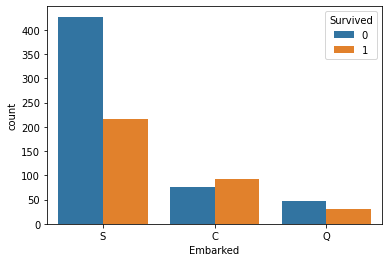

In [21]:
sns.countplot(data=df,x="Embarked",hue="Survived")

Kasih penjelasan kolom dengan cara melihat sumber 
maksud dari setiap kolom itu apa

## Data Preparation

In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [24]:
#drop colums cabin karena lebih dari 70%
df2 = df.copy(deep=True)
df2.drop(columns=["Cabin"],inplace=True)

In [25]:
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [26]:
#Replace age dan embarked
df2.Age = df.Age.fillna(df.Age.mean())
df2.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [27]:
#Memastikan tidak ada data yang kosong
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Setelah mengatasi missing value selanjutnya kita menghapus kolom yang tidak diperlukan

In [28]:
# Pertama hapus kolom yang kurang penting
# Kita hapus kolom passanger id sama name
# Hapus aja kolom yang terlalu beragam
df2.drop(columns=["PassengerId","Name","Ticket"],inplace=True)

In [29]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [30]:
# Encoding
# Merubah tipe data string/kategori menjadi numerik
df3 = pd.get_dummies(df2,drop_first=True)

In [31]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [33]:
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [34]:
TARGET = df3.Survived 
data = df3.drop(columns=["Survived"])

In [35]:
import plotly.express as px

In [36]:
px.scatter_3d(df3,x="Age",y="Fare",z="Pclass",color="Survived")

In [37]:
sample = data.sample()

In [38]:
sample

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
611,3,29.699118,0,0,7.05,1,0,1


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier().fit(data,TARGET)

In [41]:
knn.predict(sample)

array([0])

In [42]:
sample2 = df3.sample()

In [43]:
sample2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
879,1,1,56.0,0,1,83.1583,0,0,0


In [44]:
knn.predict(sample2.drop(columns=["Survived"]))

array([1])

In [45]:
# Materi SKlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, TARGET, test_size=0.33, random_state=42)